<a href="https://colab.research.google.com/github/hemanthsai831/231FA04D11/blob/main/student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
dt=pd.read_csv('/content/student_performance.csv')

In [ ]:
dt

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   StudentID                  10 non-null     int64 
 1   Name                       10 non-null     object
 2   Gender                     10 non-null     object
 3   AttendanceRate             10 non-null     int64 
 4   StudyHoursPerWeek          10 non-null     int64 
 5   PreviousGrade              10 non-null     int64 
 6   ExtracurricularActivities  10 non-null     int64 
 7   ParentalSupport            10 non-null     object
 8   FinalGrade                 10 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 852.0+ bytes


In [ ]:
dt['FinalGrade'].unique()

array([80, 87, 68, 92, 85, 90, 62, 78, 72, 88])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
l = LabelEncoder()

In [ ]:
dt['FinalGrade'] = l.fit_transform(dt['FinalGrade'])

In [ ]:
dt['FinalGrade'].unique()

array([4, 6, 1, 9, 5, 8, 0, 3, 2, 7])

In [ ]:
dt

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,4
1,2,Sarah,Female,90,20,85,2,Medium,6
2,3,Alex,Male,78,10,65,0,Low,1
3,4,Michael,Male,92,25,90,3,High,9
4,5,Emma,Female,88,18,82,2,Medium,5
5,6,Olivia,Female,95,30,88,1,High,8
6,7,Daniel,Male,70,8,60,0,Low,0
7,8,Sophia,Female,85,17,77,1,Medium,3
8,9,James,Male,82,12,70,2,Low,2
9,10,Isabella,Female,91,22,86,3,High,7


In [ ]:
x = dt.drop('FinalGrade', axis=1) # Drop the 'Species' column to get the features
y = dt['FinalGrade']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
xtest

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport
2,3,Alex,Male,78,10,65,0,Low
9,10,Isabella,Female,91,22,86,3,High


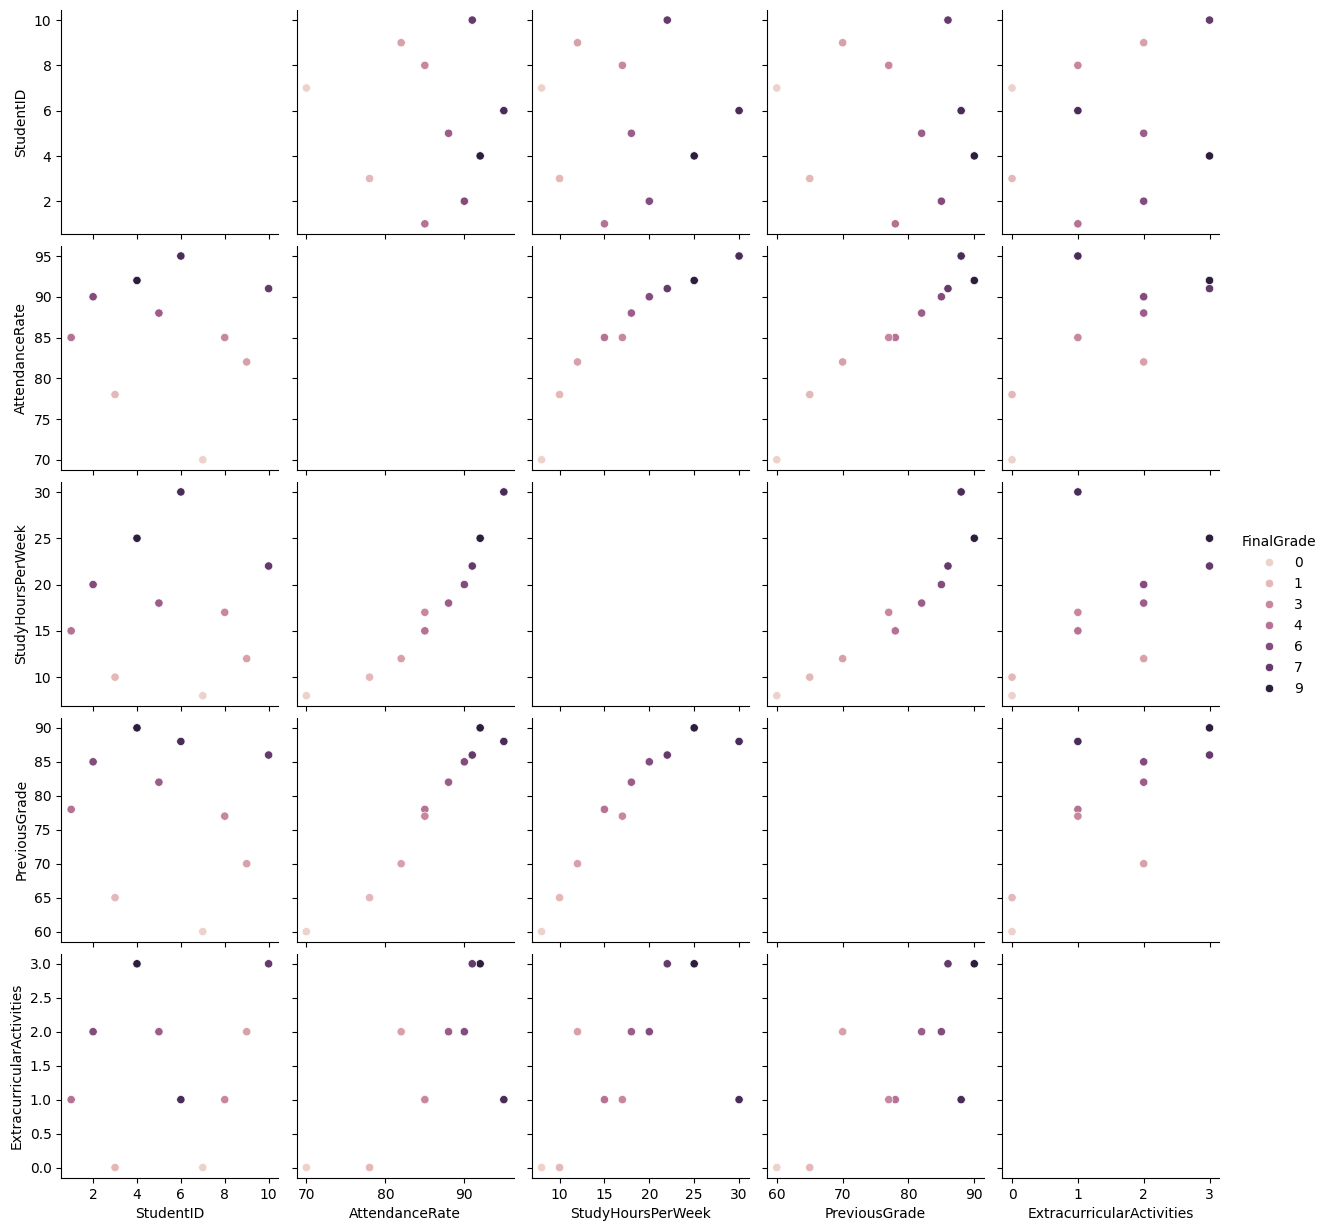

In [ ]:
sns.pairplot(dt,hue='FinalGrade')

In [ ]:
categorical_cols = xtrain.select_dtypes(include='object').columns

In [ ]:
xtrain = pd.get_dummies(xtrain, columns=categorical_cols, drop_first=True)
xtest = pd.get_dummies(xtest, columns=categorical_cols, drop_first=True)

In [ ]:
xtrain, xtest = xtrain.align(xtest, join='outer', axis=1, fill_value=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(xtrain,ytrain)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
ypred = lr.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(ytest,ypred)

0.0

In [ ]:
import pickle